# Oscillator Assignment
### S. Bilbao, December 14, 2019
### C. Lavrat, January 21, 2020

### Introdutron
In this assignment, a code is provided for the parameterised oscillator scheme,
as given in Eq. (58) in the notes. The scheme depends on an angular frequency $w0$, as well as a free paramater alpha.
You should derive a scheme of the form of:
$u^{n+1} = a \times u^{n}-u^{n-1}$, for some constant $a$, which you will determine below. 

There are three questions Q1 through Q3 below. Please edit this Matlab
code and return it with the questions answered!

Eq.58 : $\delta_{tt} u^n + \omega_0^2 (\alpha + (1-\alpha)\mu_{to})u^n$

Eq.22 : $\delta_{tt} = \delta_{t^+}\delta_{t^-} = \frac 1 {k^2} (e_{t^+} -2 +e_{t^-})$

Eq.23 : $\mu_{to} = \mu_{t^+}\mu_{t^-} = \frac 1 4 (e_{t^+} + 2 + e_{t^-})$


### Initial Values

In [2]:
Fs = 44100;       % Sampling rate
f0 = 1842;        % Frequency of the oscillator
Tf = 1;           % Duration of the generated signal
u0 = 1;           % Initial value of u (movement)
v0 = 0;           % Initial value of v (speed)
alpha = 0.8;      % Parameter of the oscillator

### Derived quantities

In [6]:
k = 1/Fs;         % Temporal Step 
w0 = 2*pi*f0;     % angular frequency
Nf = floor(Tf*Fs);% number of dot to generate (integer)

### Initialize

In [7]:
u2 = u0;
u1 = u0+k*v0;
H = zeros(Nf,1);
out = zeros(Nf,1);

### Question N°1 : Value of $a$
Insert proper value of the parameter a to be used in the update in the main loop (see comments at top of assignment).

to access to $a$ value we have to write equation 58 with 22 and 23 expressions :

Eq.58 : $\delta_{tt} u^n + \omega_0^2 (\alpha + (1-\alpha)\mu_{to})u^n=0$

$\delta_{tt} u^n + \omega_0^2 \alpha u^n + (1-\alpha)w_0^2\mu_{to}u^n = 0$

$\frac 1 {k^2} (u^{n+1} -2u^{n} + u^{n-1}) + \omega_0^2 \alpha u^n + \frac {(1-\alpha)w_0^2} 4 (u^{n+1} +2u^{n} + u^{n-1})=0$

$\left[ \frac 1 {k^2} + \frac {(1-\alpha)\omega_0^2}{4}\right]u^{n+1} +\left[ -\frac{2}{k^2}+\omega_0^2 \alpha + \frac{(1-\alpha)\omega_0 2}{4}\right]u^n  +\left[ \frac 1 {k^2} + \frac {(1-\alpha)\omega_0^2}{4}\right] u^{n-1}=0$

$ Au^{n+1}+ Bu^n + Cu^{n-1}=0$

$A = C =  \frac 1 {k^2} + \frac {(1-\alpha)\omega_0^2}{4} = \frac {(1- \alpha) \omega_0^2 k^2 +4}{4k^2}$

$B = \left[ -\frac{2}{k^2}+\omega_0^2 \alpha + \frac{(1-\alpha)\omega_0 2}{4}\right] = \frac {(1+\alpha)w_0^2k^2-4}{2 k^2}$

We put the equation into the $u^{n+1} = a u^{n}-u^{n-1}$ format

$ Au^{n+1}+ Bu^n + Cu^{n-1}=0$

$ u^{n+1} = -\frac B A u^n - \frac C A u^{n-1}=0$

$A=C$ so :

$ u^{n+1} = -\frac B A u^n - u^{n-1}=0$

$a = - \frac BA = \frac {\left[ \frac 2 {k^2} - w_0^2 \frac {[(\alpha + 1)} 2 \right]}{\left[ \frac 1 {k^2} + w0^2 \frac{(1-\alpha)} 4 \right]}$


In [21]:
a = (2/(k^2) - (w0^2)*(alpha + 1)/2)/(1/(k^2) + (w0^2)*(1-alpha)/4)

a =  1.9314


### Question N°2 : Stability condition
Check stability condition, which gives bound on k, given alpha and w0 (see the notes). Here, perform a check to make sure that the stability condition is
- satisfied, for any values of the parameters. If it is not, the code
- should exit with an error message.

The stability condition is the following:

$\frac {\alpha w_0^2 k^2} {4} \leq 1$

The parametric equation (58) is allways stable if $\alpha \leq 0$, but if $\alpha > 0$ then :

$k \leq \frac {2}{\omega_0 \sqrt{\alpha}}$


In [22]:
if k <= 2/w0*sqrt(alpha)
    fprintf('INFO : Stability condition : satisfied!\n');
else
    error('WARNING! : Stability condition : NOT satisfied!\n');
    return;
end

INFO : Stability condition : satisfied!


### Question N°3 : Conserved energy expression
Derive an expression for conserved energy and insert here below:
Using the identities from the notes at Expr. (38) and Expr. (53) and
using the parametrized scheme obtained in Q1, we get: 

$\delta_{tt} u^n + \omega_0^2 \alpha u^n + (1-\alpha)w_0^2\mu_{to}u^n = 0$

$\delta_{t0}u^n\delta_{tt}u^n + \omega_0^2 \alpha \delta_{t0}u^nu^n + (1-\alpha)w_0^2\delta_{t0}u^n\mu_{t0}u^n = 0$

But :

$\delta_{t0}u^n\delta_{tt}u^n = \delta_{t+}\left[ \frac 12 (\delta_{t-}u^n)^2 \right]$

$\delta_{t0}u^n\mu_{t0}u^n = \delta_{t+}\left[ \frac 12 (\mu_{t-}u^n)^2 \right]$

$\delta_{t0}u^n = \delta_{t+}\mu_{t-}u^n$

So : 

$\delta_{t+}\left[ \frac 12 (\delta_{t-}u^n)^2 \right] + \omega_0^2 \alpha \delta_{t+}\mu_{t-}u^nu^n + (1-\alpha)w_0^2\delta_{t+}\left[ \frac 12 (\mu_{t-}u^n)^2 \right] = 0$

$\delta_{t+}\left[ \frac 12 (\delta_{t-}u^n)^2 + \omega_0^2 \alpha \mu_{t-}u^nu^n + (1-\alpha)w_0^2\left[ \frac 12 (\mu_{t-}u^n)^2 \right]\right] = 0$

$\delta_{t+} \left[H\right] = 0$

$H(n) = \frac 1 {2k^2} (u^n-u^{n-1})^2 +  \frac {\omega_0^2} 2 (\alpha u^n u^{n-1} + \frac {(1-\alpha)} 2 (u^n + u^{n-1})^2)$


Elapsed time is 0.793613 seconds.


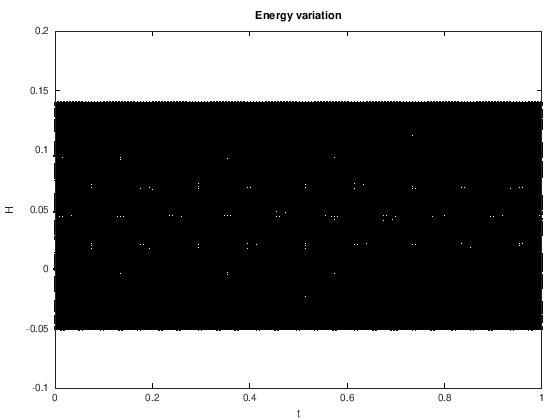

In [25]:
tic

for n=1:Nf
    u = a*u1-u2;
    out(n) = u2;
    
    % Q3: derive an expression for conserved energy and insert here below:
    % Using the identities from the notes at Expr. (38) and Expr. (53) and
    % using the parametrized scheme obtained in Q1, we get: 
    
    H(n) = 0.5*(u1-u2)^2/k^2 + 0.5*w0^2*(alpha*u1*u2 + (1 - alpha)*(0.5*(u1+u2)^2));
    
    u2 = u1;
    u1 = u;
end

toc

% plot

tax = [0:Nf-1]'*k;

Herr = (H-H(1))/H(1);
%plot(tax,Herr,'k.');
plot(tax,Herr,'k.');
xlabel('t');
ylabel('H');
title('Energy variation');

% play sound

soundsc(out,Fs)